In [397]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline

In [506]:
a = pd.read_csv('train.csv')
b = pd.read_csv('test.csv')
a.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [507]:
a.shape

(54808, 14)

In [508]:
b.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [509]:
b.shape

(23490, 13)

In [510]:
a.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [511]:
a.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [512]:
def unqiue_counts(df):
    cols = df.columns
    for c in cols[1:12]:
        print(df[c].value_counts())

In [513]:
a['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [514]:
num_corr = a.corr()
num_corr

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


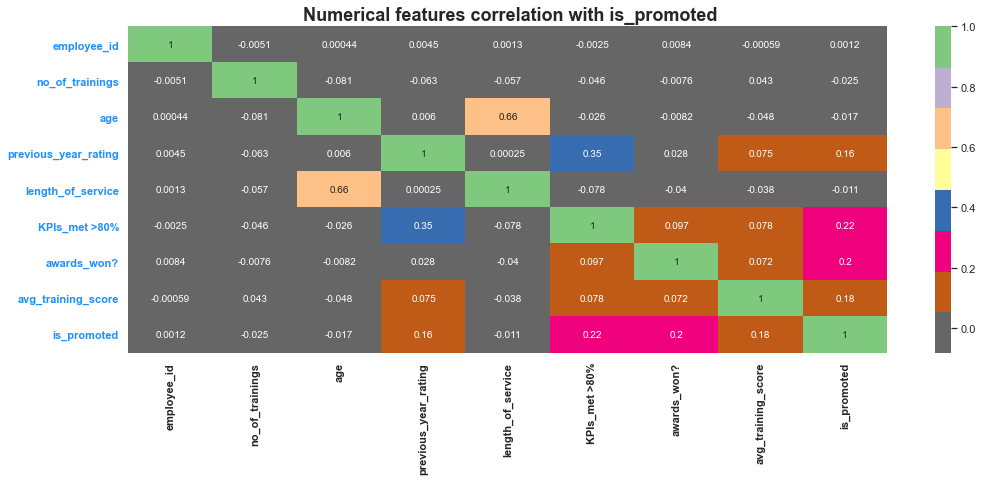

In [515]:
f,ax=plt.subplots(figsize=(17,6))

sns.heatmap(num_corr, cmap='Accent_r', annot = True)
plt.title(" Numerical features correlation with is_promoted", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)
plt.show()

In [516]:
#list(df['department'].value_counts())
a['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

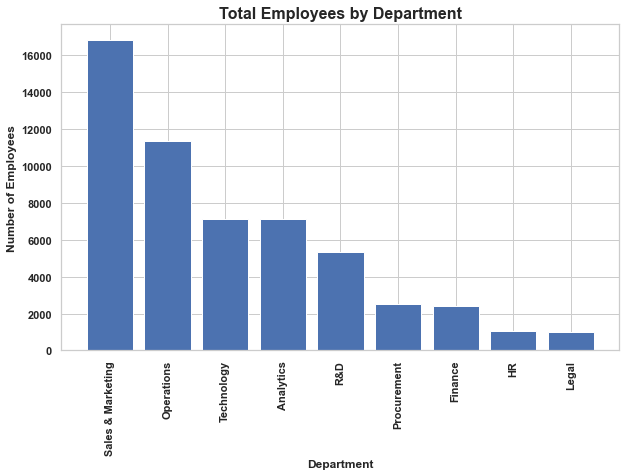

In [517]:
plt.figure(figsize=(10,6))
plt.bar(a['department'].unique(), list(a['department'].value_counts()))
plt.title('Total Employees by Department', weight='bold', fontsize=16)
plt.xlabel('Department', weight='bold', fontsize=12)
plt.ylabel('Number of Employees', weight='bold', fontsize=12)
plt.xticks(weight='bold', rotation='vertical')
plt.yticks(weight='bold')
plt.show()

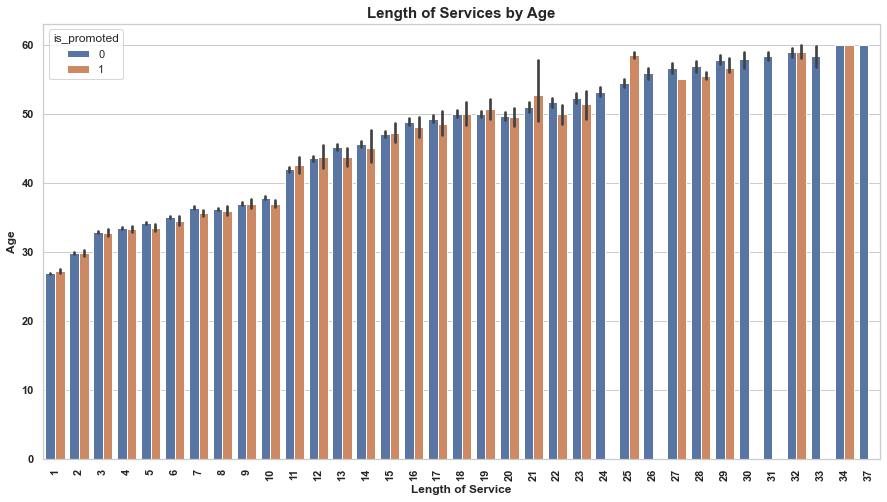

In [518]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=a['length_of_service'], y=a['age'], hue=a['is_promoted'], orient="v", ax=ax)
plt.title('Length of Services by Age', fontsize=15, weight='bold')
plt.xlabel('Length of Service', weight='bold', fontsize=12)
plt.ylabel('Age', weight='bold', fontsize=12)
plt.xticks(weight='bold', rotation='vertical')
plt.yticks(weight='bold')
plt.show()

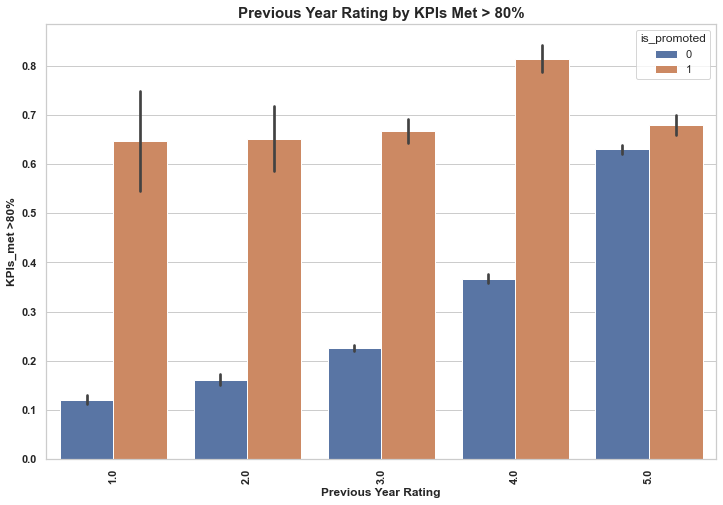

In [519]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=a['previous_year_rating'], y=a['KPIs_met >80%'], hue=a['is_promoted'], orient="v", ax=ax)
plt.title('Previous Year Rating by KPIs Met > 80%', fontsize=15, weight='bold')
plt.xlabel('Previous Year Rating', weight='bold', fontsize=12)
plt.ylabel('KPIs_met >80%', weight='bold', fontsize=12)
plt.xticks(weight='bold', rotation='vertical')
plt.yticks(weight='bold')
plt.show()

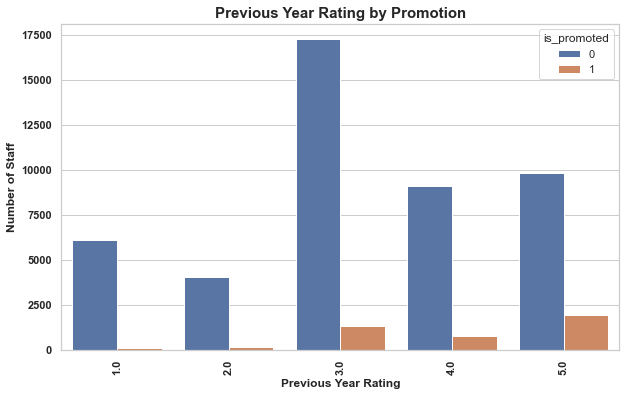

In [520]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=a['previous_year_rating'], hue=a['is_promoted'], orient="v", ax=ax)
plt.title('Previous Year Rating by Promotion', fontsize=15, weight='bold')
plt.xlabel('Previous Year Rating', weight='bold', fontsize=12)
plt.ylabel('Number of Staff', weight='bold', fontsize=12)
plt.xticks(weight='bold', rotation='vertical')
plt.yticks(weight='bold')
plt.show()

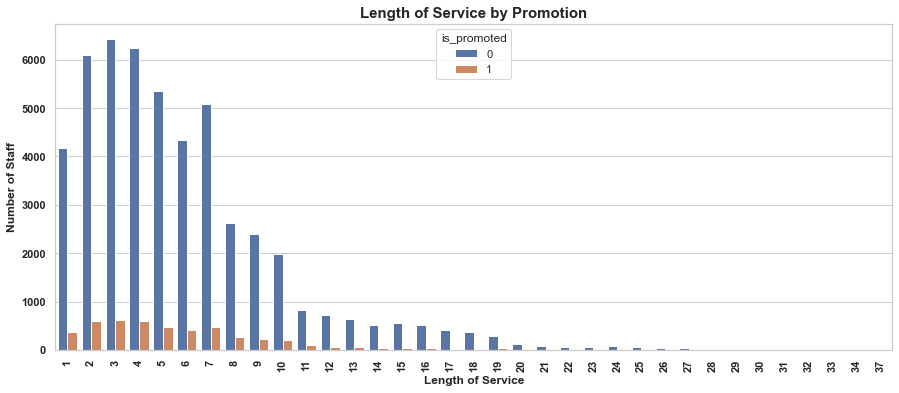

In [521]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=a['length_of_service'], hue=a['is_promoted'], orient="v", ax=ax)
plt.title('Length of Service by Promotion', fontsize=15, weight='bold')
plt.xlabel('Length of Service', weight='bold', fontsize=12)
plt.ylabel('Number of Staff', weight='bold', fontsize=12)
plt.xticks(weight='bold', rotation='vertical')
plt.yticks(weight='bold')
plt.show()

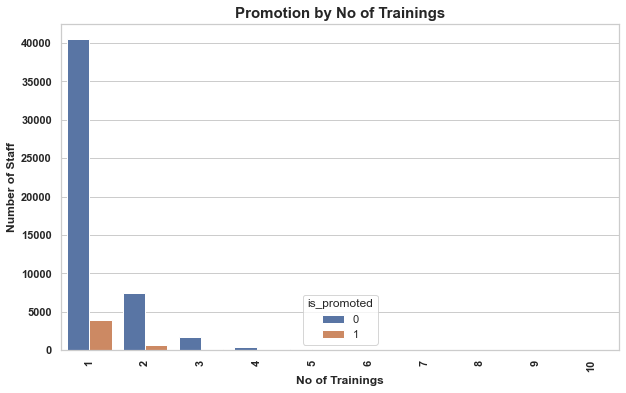

In [522]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=a['no_of_trainings'], hue=a['is_promoted'], orient="v", ax=ax)
plt.title('Promotion by No of Trainings', fontsize=15, weight='bold')
plt.xlabel('No of Trainings', weight='bold', fontsize=12)
plt.ylabel('Number of Staff', weight='bold', fontsize=12)
plt.xticks(weight='bold', rotation='vertical')
plt.yticks(weight='bold')
plt.show()

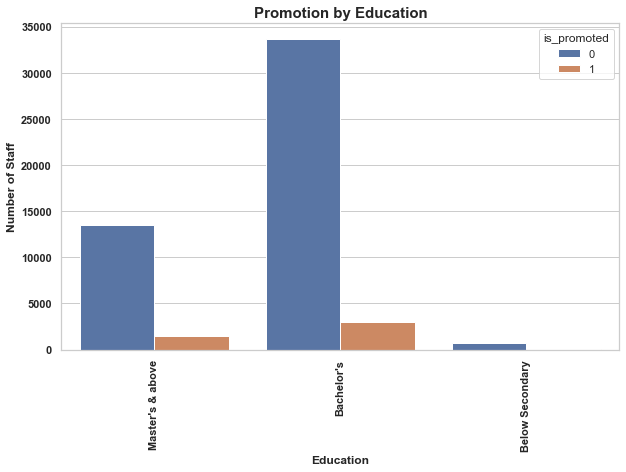

In [523]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=a['education'], hue=a['is_promoted'], orient="v", ax=ax)
plt.title('Promotion by Education', fontsize=15, weight='bold')
plt.xlabel('Education', weight='bold', fontsize=12)
plt.ylabel('Number of Staff', weight='bold', fontsize=12)
plt.xticks(weight='bold', rotation='vertical')
plt.yticks(weight='bold')
plt.show()

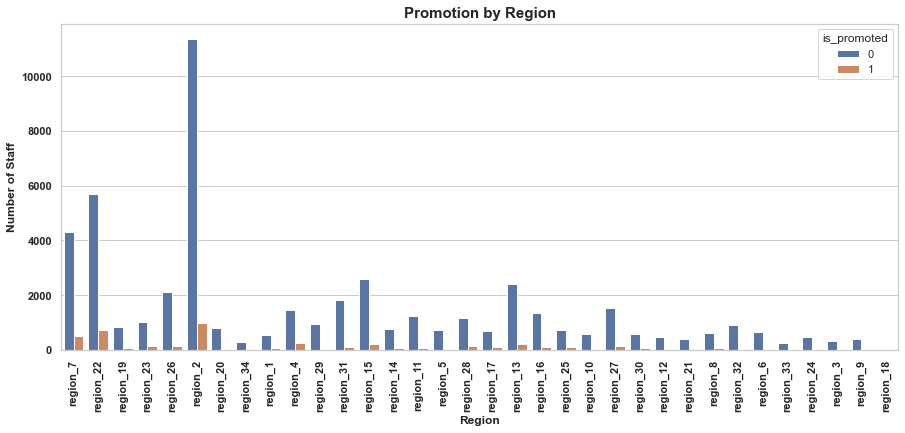

In [524]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=a['region'], hue=a['is_promoted'], orient="v", ax=ax)
plt.title('Promotion by Region', fontsize=15, weight='bold')
plt.xlabel('Region', weight='bold', fontsize=12)
plt.ylabel('Number of Staff', weight='bold', fontsize=12)
plt.xticks(weight='bold', rotation='vertical')
plt.yticks(weight='bold')
plt.show()

# Data Cleaning and Feature Engineering

In [525]:
c = a.append(b, sort=False)

In [526]:
c.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


In [527]:
c.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,NaN
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,NaN
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,NaN
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70,NaN
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89,NaN


In [528]:
c.drop(labels='recruitment_channel', axis=1, inplace=True)

In [529]:
c['education'].value_counts()

Bachelor's          52247
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64

In [530]:
def convert_categorical_to_number(dataframe):
    convert_to_nums = {
                "education": {"Unknown":0, "Below Secondary":1, "Bachelor's": 2, "Master's & above": 3 },
               
               }
    dataframe.replace(convert_to_nums, inplace = True)

In [531]:
c['previous_year_rating'] = c['previous_year_rating'].fillna(c['previous_year_rating'].dropna().mean())
c['education'] = c['education'].fillna(0)

In [532]:
convert_categorical_to_number(c)

In [533]:
c.head()

,employee_id,department,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,3,f,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,2,m,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,2,m,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,2,m,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,2,m,1,45,3.0,2,0,0,73,0.0


In [534]:
c = pd.get_dummies(c, columns=["department", "region", "gender"], drop_first=True)

In [535]:
c.head()

,employee_id,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,gender_m
0,65438,3,1,35,5.0,8,1,0,49,0.0,...,0,0,0,0,0,0,1,0,0,0
1,65141,2,1,30,5.0,4,0,0,60,0.0,...,0,0,0,0,0,0,0,0,0,1
2,7513,2,1,34,3.0,7,0,0,50,0.0,...,0,0,0,0,0,0,0,0,0,1
3,2542,2,2,39,1.0,10,0,0,50,0.0,...,0,0,0,0,0,0,0,0,0,1
4,48945,2,1,45,3.0,2,0,0,73,0.0,...,0,0,0,0,0,0,0,0,0,1


In [536]:
c['age_grp'] = pd.cut(x=c['age'], 
                       bins=[20,  30,  40,  50, 60],
                     labels=['20', '30', '40', '50'],include_lowest= True)

c['age_grp'] = c['age_grp'].astype(int)

In [537]:
c.head()

,employee_id,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,gender_m,age_grp
0,65438,3,1,35,5.0,8,1,0,49,0.0,...,0,0,0,0,0,1,0,0,0,30
1,65141,2,1,30,5.0,4,0,0,60,0.0,...,0,0,0,0,0,0,0,0,1,20
2,7513,2,1,34,3.0,7,0,0,50,0.0,...,0,0,0,0,0,0,0,0,1,30
3,2542,2,2,39,1.0,10,0,0,50,0.0,...,0,0,0,0,0,0,0,0,1,30
4,48945,2,1,45,3.0,2,0,0,73,0.0,...,0,0,0,0,0,0,0,0,1,40


In [538]:
print(f"Skewness before log transform: {a['length_of_service'].skew()}")
print(f"Kurtosis before log transform: {a['length_of_service'].kurt()}")

Skewness before log transform: 1.738061458740809
Kurtosis before log transform: 4.414031376098643


In [539]:
#sns.boxplot(x=a['age'])

# Model Training

In [540]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold, StratifiedKFold, RepeatedStratifiedKFold
from scipy.stats import uniform
from sklearn import model_selection
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesRegressor
import lightgbm as ltb
#from sklearn.model_selection import LeaveOneOut
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [541]:
Train = c[:54808]
Test = c[54808:]

In [544]:
Train.shape, Test.shape

((54808, 53), (23490, 53))

In [545]:
X = Train.drop(['is_promoted', 'employee_id'], axis=1)
y = Train['is_promoted']
Test_Data = Test.drop(['is_promoted', 'employee_id'], axis=1)

In [546]:
X.head()

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,...,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,gender_m,age_grp
0,3,1,35,5.0,8,1,0,49,0,0,...,0,0,0,0,0,1,0,0,0,30
1,2,1,30,5.0,4,0,0,60,0,0,...,0,0,0,0,0,0,0,0,1,20
2,2,1,34,3.0,7,0,0,50,0,0,...,0,0,0,0,0,0,0,0,1,30
3,2,2,39,1.0,10,0,0,50,0,0,...,0,0,0,0,0,0,0,0,1,30
4,2,1,45,3.0,2,0,0,73,0,0,...,0,0,0,0,0,0,0,0,1,40


In [547]:
Test_Data.head()

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,...,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,gender_m,age_grp
0,2,1,24,3.332219,1,1,0,77,0,0,...,0,0,0,0,0,0,0,0,1,20
1,2,1,31,3.000000,5,0,0,51,0,1,...,0,0,1,0,0,0,0,0,0,30
2,2,1,31,1.000000,4,0,0,47,0,0,...,0,0,0,0,0,0,0,0,1,30
3,2,3,31,2.000000,9,0,0,65,0,0,...,0,0,0,0,0,0,0,0,0,30
4,2,1,30,4.000000,7,0,0,61,1,0,...,0,0,0,0,0,0,0,0,1,20


In [438]:
independent_cols = ['education', 'age', 'no_of_trainings', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_10', 'region_region_11', 'region_region_12',
       'region_region_13', 'region_region_14', 'region_region_15',
       'region_region_16', 'region_region_17', 'region_region_18',
       'region_region_19', 'region_region_2', 'region_region_20',
       'region_region_21', 'region_region_22', 'region_region_23',
       'region_region_24', 'region_region_25', 'region_region_26',
       'region_region_27', 'region_region_28', 'region_region_29',
       'region_region_3', 'region_region_30', 'region_region_31',
       'region_region_32', 'region_region_33', 'region_region_34',
       'region_region_4', 'region_region_5', 'region_region_6',
       'region_region_7', 'region_region_8', 'region_region_9', 'gender_m']#'age_grp', 'education2'

dependent_col = 'is_promoted'

In [550]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 0 to 54807
Data columns (total 51 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   education                     54808 non-null  int64  
 1   no_of_trainings               54808 non-null  int64  
 2   age                           54808 non-null  int64  
 3   previous_year_rating          54808 non-null  float64
 4   length_of_service             54808 non-null  int64  
 5   KPIs_met >80%                 54808 non-null  int64  
 6   awards_won?                   54808 non-null  int64  
 7   avg_training_score            54808 non-null  int64  
 8   department_Finance            54808 non-null  uint8  
 9   department_HR                 54808 non-null  uint8  
 10  department_Legal              54808 non-null  uint8  
 11  department_Operations         54808 non-null  uint8  
 12  department_Procurement        54808 non-null  uint8  
 13  d

In [551]:
print(y.value_counts())

0.0    50140
1.0     4668
Name: is_promoted, dtype: int64


In [441]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [442]:
#sm = SMOTE(random_state=12)
#X_train, y_train = sm.fit_sample(X_train_orginal, y_train_orginal)

In [443]:
#cv = StratifiedKFold(n_splits=10, shuffle=True)

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

In [444]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train) 
rf_model_preds = rf_model.predict(X_test)

In [445]:
print(f1_score(y_test, rf_model_preds))

0.4563617245005257


In [448]:
rf_cm = confusion_matrix(y_test, rf_model_preds)

In [449]:
def generate_confusion_matrix(cm):
    
    group_names  = ['True Positive','False Positive','False Negative','True Negative']
    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    plt.figure(figsize=(10, 7))
    ax= plt.subplot()
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['No - Not Promoted', 'Yes - Promoted']); ax.yaxis.set_ticklabels(['No - Not Promoted','Yes - Promoted']);

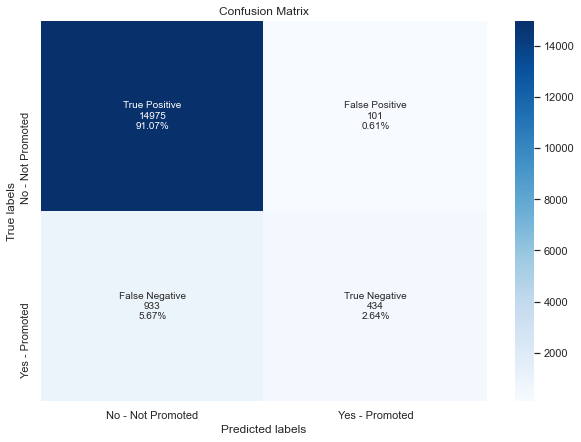

In [450]:
generate_confusion_matrix(rf_cm)

In [451]:
cv = RepeatedStratifiedKFold(n_splits=10, random_state=123)
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [452]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [453]:
rf_cv = RandomizedSearchCV(estimator = rf_model, param_distributions=random_grid, n_iter = 20, cv = 3, 
                               verbose=2, random_state=42)

rf_cv.fit(X_train,y_train)
print(rf_cv.best_estimator_)
print(rf_cv.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   1.6s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   1.6s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   1.6s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20, total=   8.0s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20, total=   8.0s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20, total=   8.2s
[CV] n_estimators=100, min_samples_split

[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=  14.7s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=  13.1s
[CV] n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   3.5s
[CV] n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   3.4s
[CV] n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   3.5s
[CV] n_estimators=600, min_s

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  9.2min finished


RandomForestClassifier(max_depth=25, min_samples_split=15, n_estimators=900)
0.9327772613473032


In [459]:
rf_cv_model = RandomForestClassifier(max_depth=25, min_samples_split=15, n_estimators=900)

In [460]:
rf_cv_model.fit(X_train, y_train) 
rf_cv_model_preds = rf_cv_model.predict(X_test)

In [461]:
print(f1_score(y_test, rf_cv_model_preds))

0.4317925591882751


In [462]:
rf_cv_cm = confusion_matrix(y_test, rf_cv_model_preds)

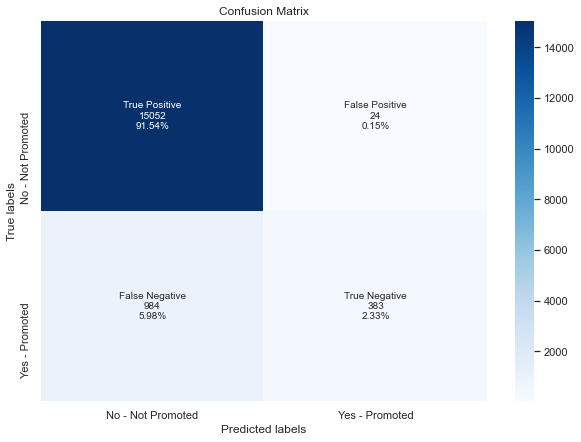

In [463]:
generate_confusion_matrix(rf_cv_cm)

In [464]:
import pickle

In [465]:
#random forest cv model picklet
pickle.dump(rf_cv_cm, open('randomforest_hyper.pkl', 'wb'))

# XGBoost

In [466]:
from xgboost.sklearn import XGBClassifier
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)
xgb_preds = xgb_clf.predict(X_test)

In [467]:
print(f1_score(y_test, xgb_preds))

0.503125


In [469]:
xgb_cm = confusion_matrix(y_test, xgb_preds)

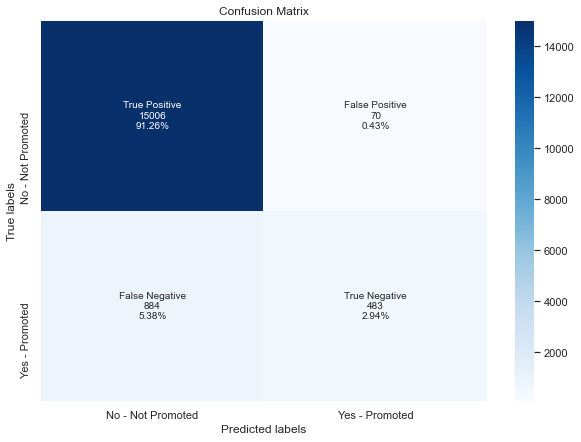

In [470]:
generate_confusion_matrix(xgb_cm)

In [471]:
#https://machinelearningmastery.com/tune-learning-rate-for-gradient-boosting-with-xgboost-in-python/
xgbaram = {'learning_rate' : [0.01],
               'n_estimators':[2000, 3460, 4000],
               'max_depth':[3], 'min_child_weight':[3,5],
               'colsample_bytree':[0.5,0.7],
               'reg_alpha':[0.0001,0.001,0.01,0.1,10,100],
               'reg_lambda':[1,0.01,0.8,0.001,0.0001]}

In [472]:
xgb_cv_model = RandomizedSearchCV(estimator = xgb_clf, param_distributions=xgbaram, 
                                  n_iter = 30, cv = 5, 
                                  verbose=2, random_state=42)

xgb_cv_model.fit(X_train,y_train)
print(xgb_cv_model.best_estimator_)
print(xgb_cv_model.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] reg_lambda=0.0001, reg_alpha=0.01, n_estimators=3460, min_child_weight=3, max_depth=3, learning_rate=0.01, colsample_bytree=0.7 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  reg_lambda=0.0001, reg_alpha=0.01, n_estimators=3460, min_child_weight=3, max_depth=3, learning_rate=0.01, colsample_bytree=0.7, total=  21.9s
[CV] reg_lambda=0.0001, reg_alpha=0.01, n_estimators=3460, min_child_weight=3, max_depth=3, learning_rate=0.01, colsample_bytree=0.7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.8s remaining:    0.0s


[CV]  reg_lambda=0.0001, reg_alpha=0.01, n_estimators=3460, min_child_weight=3, max_depth=3, learning_rate=0.01, colsample_bytree=0.7, total=  24.2s
[CV] reg_lambda=0.0001, reg_alpha=0.01, n_estimators=3460, min_child_weight=3, max_depth=3, learning_rate=0.01, colsample_bytree=0.7 
[CV]  reg_lambda=0.0001, reg_alpha=0.01, n_estimators=3460, min_child_weight=3, max_depth=3, learning_rate=0.01, colsample_bytree=0.7, total=  24.8s
[CV] reg_lambda=0.0001, reg_alpha=0.01, n_estimators=3460, min_child_weight=3, max_depth=3, learning_rate=0.01, colsample_bytree=0.7 
[CV]  reg_lambda=0.0001, reg_alpha=0.01, n_estimators=3460, min_child_weight=3, max_depth=3, learning_rate=0.01, colsample_bytree=0.7, total=  24.6s
[CV] reg_lambda=0.0001, reg_alpha=0.01, n_estimators=3460, min_child_weight=3, max_depth=3, learning_rate=0.01, colsample_bytree=0.7 
[CV]  reg_lambda=0.0001, reg_alpha=0.01, n_estimators=3460, min_child_weight=3, max_depth=3, learning_rate=0.01, colsample_bytree=0.7, total=  26.5s
[C

[CV]  reg_lambda=1, reg_alpha=0.1, n_estimators=2000, min_child_weight=3, max_depth=3, learning_rate=0.01, colsample_bytree=0.5, total=  15.2s
[CV] reg_lambda=1, reg_alpha=0.1, n_estimators=2000, min_child_weight=3, max_depth=3, learning_rate=0.01, colsample_bytree=0.5 
[CV]  reg_lambda=1, reg_alpha=0.1, n_estimators=2000, min_child_weight=3, max_depth=3, learning_rate=0.01, colsample_bytree=0.5, total=  16.0s
[CV] reg_lambda=1, reg_alpha=0.1, n_estimators=2000, min_child_weight=3, max_depth=3, learning_rate=0.01, colsample_bytree=0.5 
[CV]  reg_lambda=1, reg_alpha=0.1, n_estimators=2000, min_child_weight=3, max_depth=3, learning_rate=0.01, colsample_bytree=0.5, total=  17.4s
[CV] reg_lambda=1, reg_alpha=0.1, n_estimators=2000, min_child_weight=3, max_depth=3, learning_rate=0.01, colsample_bytree=0.5 
[CV]  reg_lambda=1, reg_alpha=0.1, n_estimators=2000, min_child_weight=3, max_depth=3, learning_rate=0.01, colsample_bytree=0.5, total=  15.7s
[CV] reg_lambda=0.8, reg_alpha=100, n_estima

[CV]  reg_lambda=1, reg_alpha=0.0001, n_estimators=3460, min_child_weight=3, max_depth=3, learning_rate=0.01, colsample_bytree=0.7, total=  29.3s
[CV] reg_lambda=1, reg_alpha=0.0001, n_estimators=3460, min_child_weight=3, max_depth=3, learning_rate=0.01, colsample_bytree=0.7 
[CV]  reg_lambda=1, reg_alpha=0.0001, n_estimators=3460, min_child_weight=3, max_depth=3, learning_rate=0.01, colsample_bytree=0.7, total=  30.7s
[CV] reg_lambda=1, reg_alpha=0.0001, n_estimators=3460, min_child_weight=3, max_depth=3, learning_rate=0.01, colsample_bytree=0.7 
[CV]  reg_lambda=1, reg_alpha=0.0001, n_estimators=3460, min_child_weight=3, max_depth=3, learning_rate=0.01, colsample_bytree=0.7, total=  30.3s
[CV] reg_lambda=1, reg_alpha=0.0001, n_estimators=3460, min_child_weight=3, max_depth=3, learning_rate=0.01, colsample_bytree=0.7 
[CV]  reg_lambda=1, reg_alpha=0.0001, n_estimators=3460, min_child_weight=3, max_depth=3, learning_rate=0.01, colsample_bytree=0.7, total=  35.6s
[CV] reg_lambda=0.0001,

[CV]  reg_lambda=0.0001, reg_alpha=0.1, n_estimators=3460, min_child_weight=5, max_depth=3, learning_rate=0.01, colsample_bytree=0.5, total=  23.2s
[CV] reg_lambda=0.0001, reg_alpha=0.1, n_estimators=3460, min_child_weight=5, max_depth=3, learning_rate=0.01, colsample_bytree=0.5 
[CV]  reg_lambda=0.0001, reg_alpha=0.1, n_estimators=3460, min_child_weight=5, max_depth=3, learning_rate=0.01, colsample_bytree=0.5, total=  23.0s
[CV] reg_lambda=0.0001, reg_alpha=0.1, n_estimators=3460, min_child_weight=5, max_depth=3, learning_rate=0.01, colsample_bytree=0.5 
[CV]  reg_lambda=0.0001, reg_alpha=0.1, n_estimators=3460, min_child_weight=5, max_depth=3, learning_rate=0.01, colsample_bytree=0.5, total=  28.6s
[CV] reg_lambda=0.0001, reg_alpha=0.1, n_estimators=3460, min_child_weight=5, max_depth=3, learning_rate=0.01, colsample_bytree=0.5 
[CV]  reg_lambda=0.0001, reg_alpha=0.1, n_estimators=3460, min_child_weight=5, max_depth=3, learning_rate=0.01, colsample_bytree=0.5, total=  24.8s
[CV] reg_

[CV]  reg_lambda=0.8, reg_alpha=100, n_estimators=2000, min_child_weight=5, max_depth=3, learning_rate=0.01, colsample_bytree=0.7, total=  16.3s
[CV] reg_lambda=0.8, reg_alpha=100, n_estimators=2000, min_child_weight=5, max_depth=3, learning_rate=0.01, colsample_bytree=0.7 
[CV]  reg_lambda=0.8, reg_alpha=100, n_estimators=2000, min_child_weight=5, max_depth=3, learning_rate=0.01, colsample_bytree=0.7, total=  16.4s
[CV] reg_lambda=0.8, reg_alpha=100, n_estimators=2000, min_child_weight=5, max_depth=3, learning_rate=0.01, colsample_bytree=0.7 
[CV]  reg_lambda=0.8, reg_alpha=100, n_estimators=2000, min_child_weight=5, max_depth=3, learning_rate=0.01, colsample_bytree=0.7, total=  16.8s
[CV] reg_lambda=0.8, reg_alpha=100, n_estimators=2000, min_child_weight=5, max_depth=3, learning_rate=0.01, colsample_bytree=0.7 
[CV]  reg_lambda=0.8, reg_alpha=100, n_estimators=2000, min_child_weight=5, max_depth=3, learning_rate=0.01, colsample_bytree=0.7, total=  16.6s
[CV] reg_lambda=1, reg_alpha=0

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 69.4min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=4000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0.001, reg_lambda=0.001, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
0.9414049263651766


In [477]:
xgb_clf_model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                                  colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
                                  importance_type='gain', learning_rate=0.01, max_delta_step=0, 
                                  max_depth=3, min_child_weight=3, n_estimators=4000, n_jobs=0, 
                                  num_parallel_tree=1, random_state=0, reg_alpha=0.001, reg_lambda=0.001, 
                                  scale_pos_weight=1, subsample=1, tree_method='exact', 
                                  validate_parameters=1, verbosity=None)
xgb_clf_model.fit(X_train,y_train)
xgb_clf_model_preds = xgb_clf_model.predict(X_test)

In [478]:
print(f1_score(y_test, xgb_clf_model_preds))

0.5056119722073759


In [479]:
xgb_clf_model_cm = confusion_matrix(y_test, xgb_clf_model_preds)

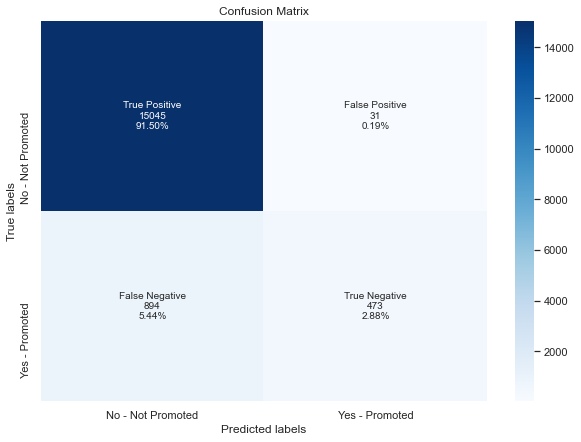

In [480]:
generate_confusion_matrix(xgb_clf_model_cm)

In [481]:
#random forest cv model picklet
pickle.dump(xgb_clf_model_cm, open('xgboost_hyper.pkl', 'wb'))

# Inference

In [552]:
Test_Data.head()

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,...,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,gender_m,age_grp
0,2,1,24,3.332219,1,1,0,77,0,0,...,0,0,0,0,0,0,0,0,1,20
1,2,1,31,3.000000,5,0,0,51,0,1,...,0,0,1,0,0,0,0,0,0,30
2,2,1,31,1.000000,4,0,0,47,0,0,...,0,0,0,0,0,0,0,0,1,30
3,2,3,31,2.000000,9,0,0,65,0,0,...,0,0,0,0,0,0,0,0,0,30
4,2,1,30,4.000000,7,0,0,61,1,0,...,0,0,0,0,0,0,0,0,1,20


In [554]:
test_xgb_preds = xgb_clf_model.predict(Test_Data)

In [555]:
b['is_promoted'] = test_xgb_preds

In [556]:
b.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,0.0
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,0.0
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,0.0
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,0.0
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,0.0


In [557]:
final = b[['employee_id', 'is_promoted']]

In [558]:
final['is_promoted'] = final['is_promoted'].astype(int)

C:\Users\joekhaung\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [559]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   employee_id  23490 non-null  int64
 1   is_promoted  23490 non-null  int32
dtypes: int32(1), int64(1)
memory usage: 275.4 KB


In [560]:
final.to_csv('xgb_preds_with_hyper_onehot.csv', index = False)